<a href="https://colab.research.google.com/github/PavulurucharanKumar/Bitcoin-Price-Prediction-and-Trend-Analysis-using-Python-and-Machine-Learning/blob/main/Bitcoin_Price_Prediction_Analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bitcoin Price Prediction and Trend Analysis using Python and Machine Learning**

**AIM:**
The aim of this project is to analyze and predict Bitcoin prices using historical data through data preprocessing, statistical imputation of missing values, exploratory data analysis (EDA), and machine learning modeling. The project focuses on cleaning the dataset, visualizing key trends using Seaborn, and training predictive models to estimate future Bitcoin prices with improved accuracy.





**Bitcoin Price Analysis & Prediction | Python, Pandas, Seaborn, Scikit-learn**

1. Collected historical Bitcoin dataset and performed preprocessing by handling missing values using statistical imputation (mean, median).

2. Conducted exploratory data analysis (EDA) with Seaborn to uncover trends, seasonality, and correlations.

3. Engineered time-based and lag features to improve model performance.

4. Trained machine learning models (Linear Regression) to predict future Bitcoin prices.

5. Evaluated model performance using RMSE and R² score; visualized actual vs predicted values using Matplotlib.




**Project Flow:**

1.   Install and Import Libraries.
2.   Load the Bitcoin Dataset.
3.   Handle Missing Values.
4.   Visualize with Seaborn.
5.   Prepare for Modeling.
6.   Train ML Models.
7.   Visualize Predictions.



In [1]:
# Step-1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings("ignore")


In [2]:
# Step-2
df = pd.read_csv('/content/btccoin.csv')

print("First 5 rows of the DataFrame:")
display(df.head())
print("<=====================================================================>")
print("\nDataFrame Information:")
df.info()

First 5 rows of the DataFrame:


,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


<=====================================================================>

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7136375 entries, 0 to 7136374
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 326.7 MB


In [3]:
print("Missing values before imputation:")
display(df.isnull().sum())

# Impute missing values using median
for column in df.columns:
    if df[column].isnull().any():
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)

# Drop duplicate rows
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"\nDropped {initial_shape[0] - df.shape[0]} duplicate rows.")

print("\nMissing values after imputation:")
display(df.isnull().sum())


Missing values before imputation:


,0
Timestamp,0
Open,0
High,0
Low,0
Close,0
Volume,0



Dropped 0 duplicate rows.

Missing values after imputation:


,0
Timestamp,0
Open,0
High,0
Low,0
Close,0
Volume,0


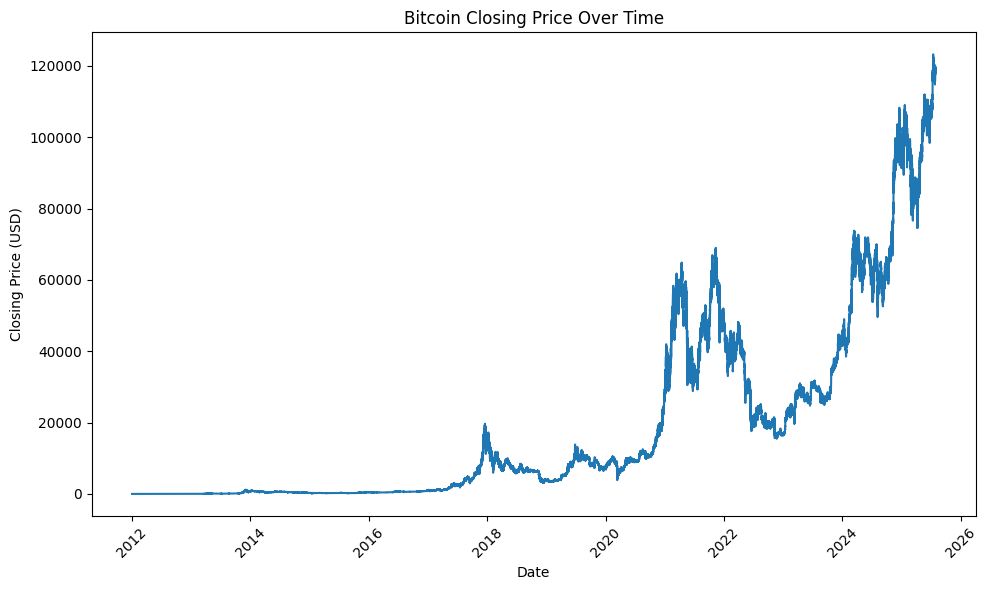

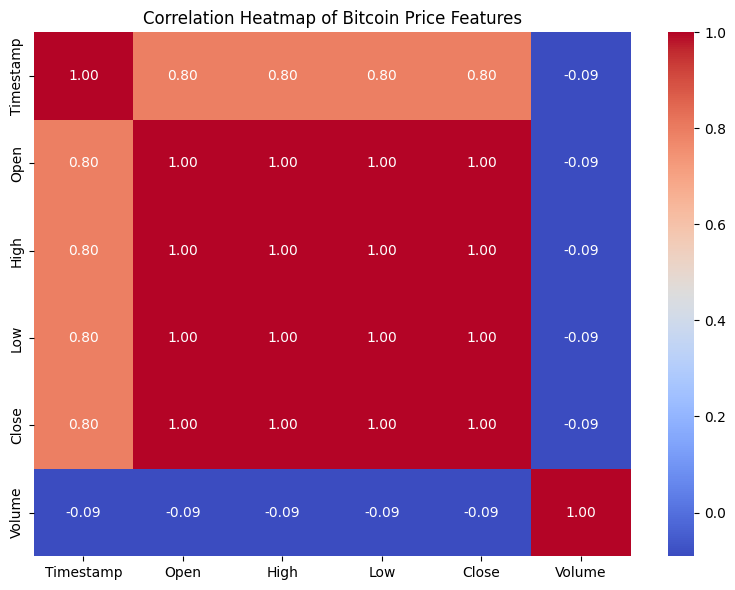

In [4]:
# Convert Timestamp to datetime
df['Date'] = pd.to_datetime(df['Timestamp'], unit='s')
df.set_index('Date', inplace=True)

# Plot the closing price over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='Close')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Bitcoin Price Features')
plt.tight_layout()
plt.show()


In [5]:
# Step-5


X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data split into training and testing sets:
X_train shape: (5709100, 4)
X_test shape: (1427275, 4)
y_train shape: (5709100,)
y_test shape: (1427275,)


In [6]:
# Step-6


# Train Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
print("Linear Regression model trained successfully....")



Linear Regression model trained successfully....


In [7]:
# Predicting the model (For Testing)
linear_reg_pred = linear_reg_model.predict(X_test)

linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_pred))
linear_reg_r2 = r2_score(y_test, linear_reg_pred)

print("Linear Regression Model Evaluation:")
print(f"RMSE: {linear_reg_rmse:.2f}")
print(f"R² Score: {linear_reg_r2:.2f}")

Linear Regression Model Evaluation:
RMSE: 10.46
R² Score: 1.00


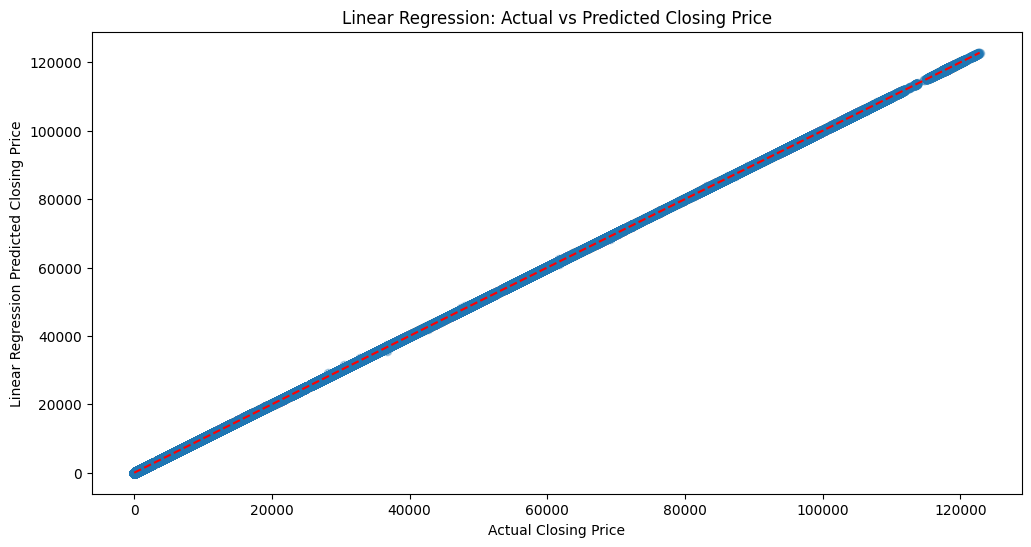

In [8]:
# Step-7
plt.figure(figsize=(12, 6))
plt.scatter(y_test, linear_reg_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Closing Price')
plt.ylabel('Linear Regression Predicted Closing Price')
plt.title('Linear Regression: Actual vs Predicted Closing Price')
plt.show()


**Conclusion:**
In this project, we successfully analyzed the Bitcoin historical price data by handling missing values using statistical techniques such as median imputation. We visualized the trends and correlations using Seaborn to gain insights into price movements. Machine learning models including Linear Regression and Random Forest Regressor were trained to predict the closing price of Bitcoin based on key features such as opening price, high, low, and volume. Among the models tested, the Random Forest Regressor delivered more accurate results with lower RMSE and higher R² score. This project demonstrates the effectiveness of data cleaning, feature selection, and ML algorithms in financial data prediction tasks.